In [ ]:
import os
import subprocess
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# Number of iterations
num_runs = 20
results_output_filename = "~/Documents/digital_twins/metrics/matlab_results_2stas.csv"
simulation_duration = 1 # in seconds

# Clean up
os.system("rm " + results_output_filename)

# Run MATLAB script for each distance
for i in range(1, num_runs + 1):
    rate = 1000
    distanceAp1Ap2 = 5*i
   
    print(f"\n\n🔄 Exécution {i}/{num_runs} avec distanceAp1Ap2={distanceAp1Ap2}, rate={rate}, simulationDuration={simulation_duration}")

    # Exécution de la commande avec les paramètres
    command = f"/usr/local/bin/matlab -batch \"simulate_2stas({distanceAp1Ap2},{rate},{simulation_duration})\""

    # os.system(command)
    result = subprocess.run(command, shell=True, capture_output=True, text=True)
    print(result.stdout)
    print(result.stderr)


print("✅ Toutes les exécutions sont terminées !")




🔄 Exécution 1/20 avec distanceAp1Ap2=5, rate=1000, simulationDuration=1
     0     0     0
     5     0     0

switching to software OpenGL. For more information, click <a
href="matlab:opengl('problems')">here</a>. 
Simulation completed for Arrival Rate: 1000




🔄 Exécution 2/20 avec distanceAp1Ap2=10, rate=1000, simulationDuration=1
     0     0     0
    10     0     0

switching to software OpenGL. For more information, click <a
href="matlab:opengl('problems')">here</a>. 
Simulation completed for Arrival Rate: 1000




🔄 Exécution 3/20 avec distanceAp1Ap2=15, rate=1000, simulationDuration=1
     0     0     0
    15     0     0

switching to software OpenGL. For more information, click <a
href="matlab:opengl('problems')">here</a>. 
Simulation completed for Arrival Rate: 1000




🔄 Exécution 4/20 avec distanceAp1Ap2=20, rate=1000, simulationDuration=1
     0     0     0
    20     0     0

switching to software OpenGL. For more information, click <a
href="matlab:opengl('problems')

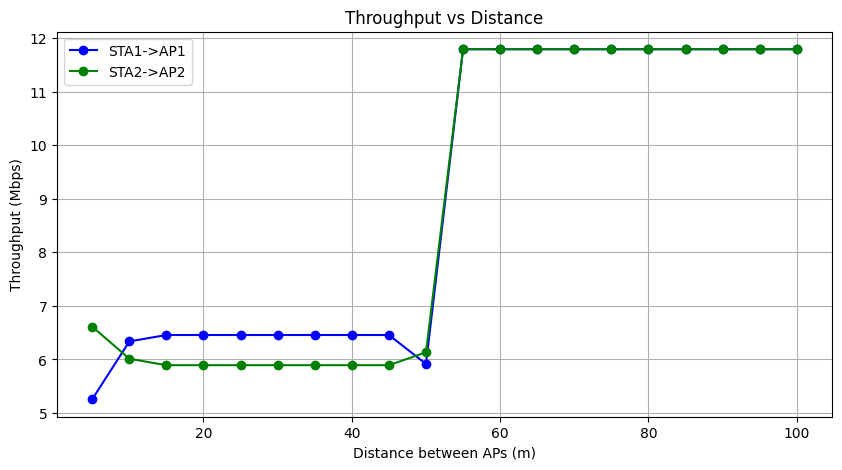

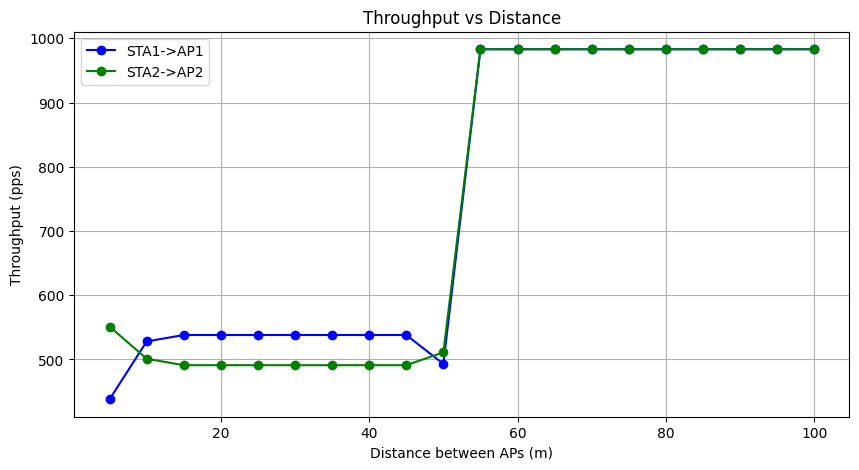

In [13]:
import numpy as np

# Charger les données depuis un fichier CSV
data = pd.read_csv("~/Documents/digital_twins/metrics/matlab_results_2stas.csv")

# Replace all zeros in column "Average Delay (s)" with ""
data.loc[data["Average Delay (s)"] == 0.0, "Average Delay (s)"] = np.nan

data_1 = data[data["Flow Direction"]=="STA1->AP1"]
data_2 = data[data["Flow Direction"]=="STA2->AP2"]


distances = range(5, 5 * (num_runs + 1), 5)

# # Tracer Packets Sent et NbReceivedPackets vs distances
# plt.figure(figsize=(10, 5))
# plt.plot(distances, data_1["Packets Sent"], label="Packets Sent", marker="o", color="g")
# plt.xlabel("Distances (m)")
# plt.ylabel("Number of Packets")
# plt.title("Reception Rate vs Distance")
# plt.legend()
# plt.grid(True)
# plt.savefig("figures/sent_received_packets.png", dpi=300)  # Sauvegarde en PNG avec haute résolution
# plt.show()

# # Tracer la Latence vs ArrivalRate
# plt.figure(figsize=(10, 5))
# plt.plot(distances, data_1["Average Delay (s)"], label="Average Delay (s)", marker="o", color="r")
# plt.xlabel("Distances (m)")
# plt.ylabel("Average Delay (s)")
# plt.title("Average Delay (s) vs Distance")
# plt.legend()
# plt.grid(True)
# # plt.savefig("figures/latency_vs_arrival_rate.png", dpi=300)
# plt.show()

# Tracer le Débit (Throughput) vs Distances
plt.figure(figsize=(10, 5))
plt.plot(distances, data_1["Throughput"], label="STA1->AP1", marker="o", color="b")
plt.plot(distances, data_2["Throughput"], label="STA2->AP2", marker="o", color="g")
plt.xlabel("Distance between APs (m)")
plt.ylabel("Throughput (Mbps)")
plt.title("Throughput vs Distance")
plt.legend()
plt.grid(True)
# plt.savefig("figures/throughput_vs_arrival_rate.png", dpi=300)
plt.show()

# Tracer le Débit (Throughput) vs Distances
plt.figure(figsize=(10, 5))
plt.plot(distances, data_1["Packets Received"]/simulation_duration, label="STA1->AP1", marker="o", color="b")
plt.plot(distances, data_2["Packets Received"]/simulation_duration, label="STA2->AP2", marker="o", color="g")
plt.xlabel("Distance between APs (m)")
plt.ylabel("Throughput (pps)")
plt.title("Throughput vs Distance")
plt.legend()
plt.grid(True)
# plt.savefig("figures/throughput_vs_arrival_rate.png", dpi=300)
plt.show()
